In [208]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.express as px
from plotly.offline import iplot
from datetime import datetime
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import time
matplotlib.style.use('ggplot')

In [209]:
df=pd.read_csv('/Selection_Data.csv')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   birth_date           1000000 non-null  object 
 1   gender               1000000 non-null  object 
 2   salary               950000 non-null   float64
 3   education_level      950000 non-null   object 
 4   years_of_experience  1000000 non-null  int64  
 5   city                 1000000 non-null  object 
 6   Selected             1000000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 46.7+ MB


In [211]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,950000.0,60024.628615,23075.435008,20000.0,40084.0,60061.0,80005.0,99999.0
years_of_experience,1000000.0,6.997128,7.206478,-5.0,1.0,7.0,13.0,19.0


In [212]:
df.isna().sum()

birth_date                 0
gender                     0
salary                 50000
education_level        50000
years_of_experience        0
city                       0
Selected                   0
dtype: int64

In [213]:
df.dropna(inplace=True)
df = df[df['years_of_experience'] >= 0]
df = df[df['Selected'] == True]
df.isna().sum()

birth_date             0
gender                 0
salary                 0
education_level        0
years_of_experience    0
city                   0
Selected               0
dtype: int64

In [214]:
df.duplicated().sum()

0

In [215]:
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Calculate current date
current_date = datetime.now()

# Calculate age
df['age'] = current_date.year - df['birth_date'].dt.year

<ipython-input-215-c2b98aec4836>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [216]:
df.reset_index(inplace=True, drop=True)

In [217]:
def custome_layout(title_size = 28, hover_font_size = 16, showlegend = False):
    fig.update_layout(
    showlegend = showlegend,
    title = {
        "font" :{
            "size" :title_size,
            "family" : "tahoma"
        }
    },
    hoverlabel = {
        "bgcolor" :"#111",
        "font_size" : hover_font_size,
        "font_family" :"arial"
    }

)

In [218]:
fig = px.box(
    y=df["years_of_experience"],
    title= "Experience Distribution",
    labels={"y" :"Experience"},
)
custome_layout()

iplot(fig)

In [233]:
fig = px.box(
    y=df["age"],
    title= "AGE Distribution",
    labels={"y" :"Age"},
)
custome_layout()

iplot(fig)

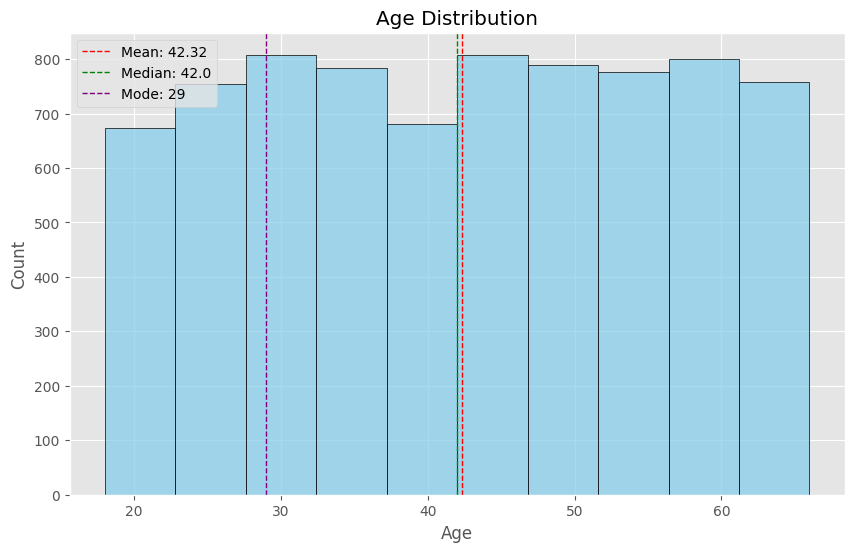

In [220]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=False, color='skyblue', edgecolor='black')

# Calculate mean, median, and mode
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]

# Adding mean, median, and mode to the plot
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_age}')
plt.axvline(mode_age, color='purple', linestyle='dashed', linewidth=1, label=f'Mode: {mode_age}')
plt.legend()

# Adding labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

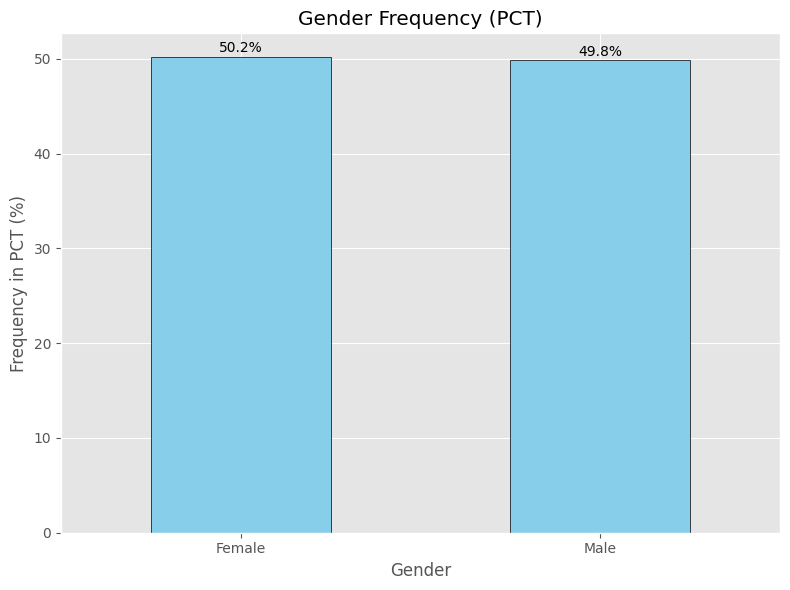

In [221]:
gender_freq = df['gender'].value_counts()

# Convert frequencies to percentages
gender_pct = (gender_freq / gender_freq.sum()) * 100

# Plotting the graph
plt.figure(figsize=(8, 6))
gender_pct.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Gender Frequency (PCT)')
plt.xlabel('Gender')
plt.ylabel('Frequency in PCT (%)')

# Adding percentage labels on top of each bar
for i, pct in enumerate(gender_pct):
    plt.text(i, pct + 0.5, f'{pct:.1f}%', ha='center')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

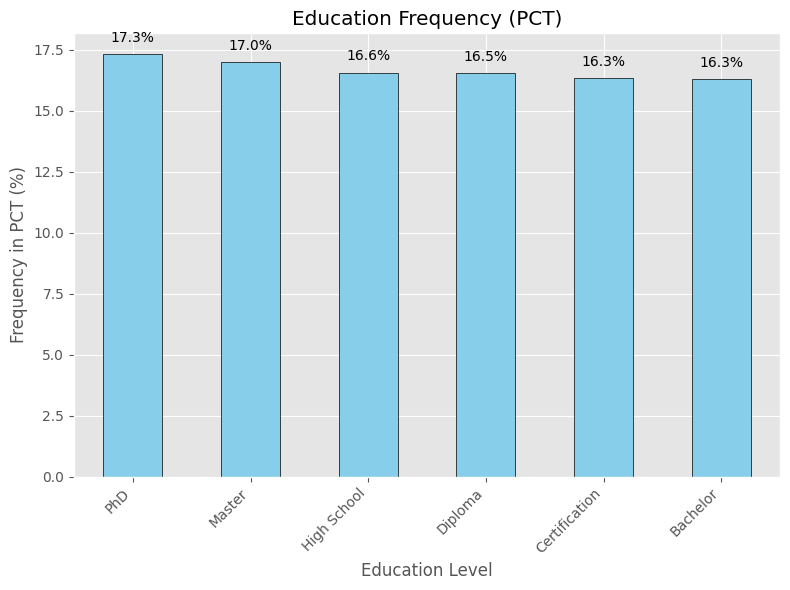

In [222]:
education_freq = df['education_level'].value_counts()

# Convert frequencies to percentages
education_pct = (education_freq / education_freq.sum()) * 100

# Plotting the graph
plt.figure(figsize=(8, 6))
education_pct.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Education Frequency (PCT)')
plt.xlabel('Education Level')
plt.ylabel('Frequency in PCT (%)')

# Adding percentage labels on top of each bar
for i, pct in enumerate(education_pct):
    plt.text(i, pct + 0.5, f'{pct:.1f}%', ha='center')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [223]:
fig = px.box(df, x='education_level', y='salary', title='Salary Distribution by Education Level')

# Customize layout
fig.update_layout(xaxis_title='Education Level', yaxis_title='Salary')

# Show the plot
fig.show()

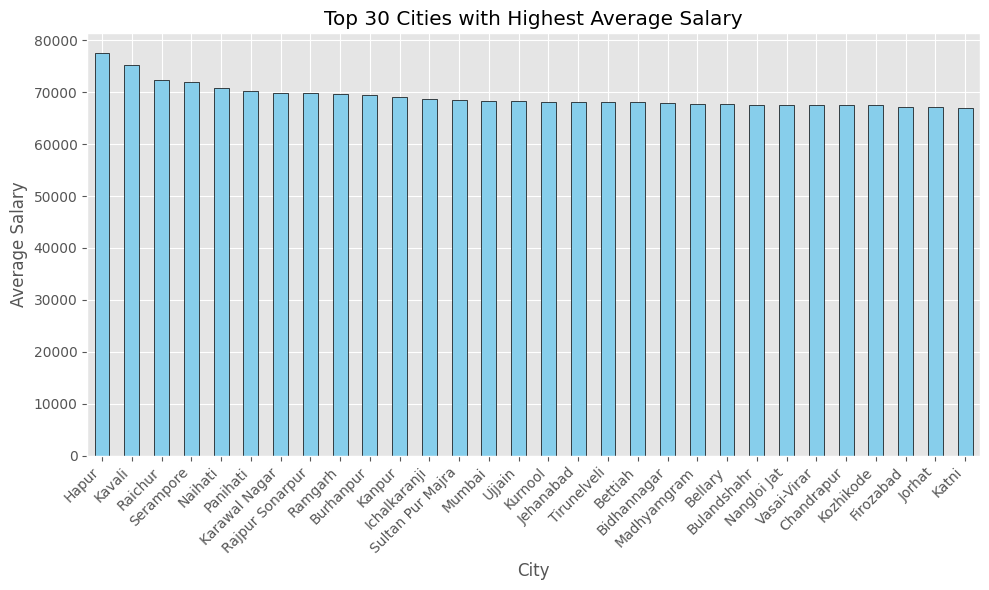

In [224]:
top_cities = df.groupby('city')['salary'].mean().nlargest(30)

# Plotting the bar graph for top N cities
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Top {} Cities with Highest Average Salary'.format(30))
plt.xlabel('City')
plt.ylabel('Average Salary')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-225-df6050aecd0c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



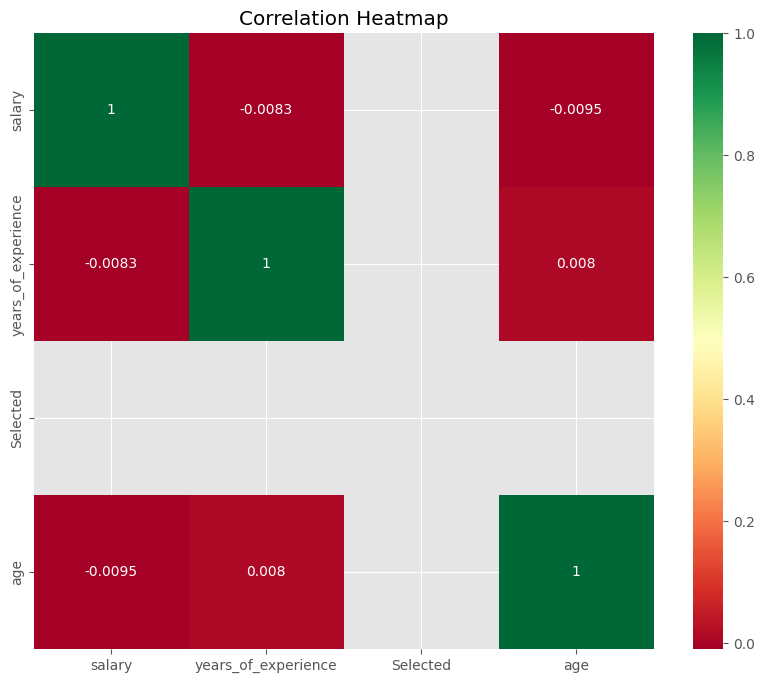

In [225]:
corr = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap="RdYlGn")
plt.title('Correlation Heatmap')
plt.show()

In [226]:

df1 = df.head(10)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get latitude and longitude for a given city with a delay
def get_lat_long_with_delay(city):
    time.sleep(1)  # Add a delay of 1 second between each request to prevent overload
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Apply the function to get latitude and longitude for each city
df1.loc[:, 'latitude'], df1.loc[:, 'longitude'] = zip(*df1['city'].apply(get_lat_long_with_delay))

# Filter out rows with missing latitude or longitude values
# df1 = df1.dropna(subset=['latitude', 'longitude'])

# # Create a map centered on India
# india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# # Add markers for each city
# for index, row in df1.iterrows():
#     folium.Marker(location=[row['latitude'], row['longitude']], popup=row['city']).add_to(india_map)

# # Display the map
# india_map.save('india_cities_map.html')

<ipython-input-226-5b81e0cd987f>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-226-5b81e0cd987f>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-227-37bd42e63296>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Price Distribution Plot')

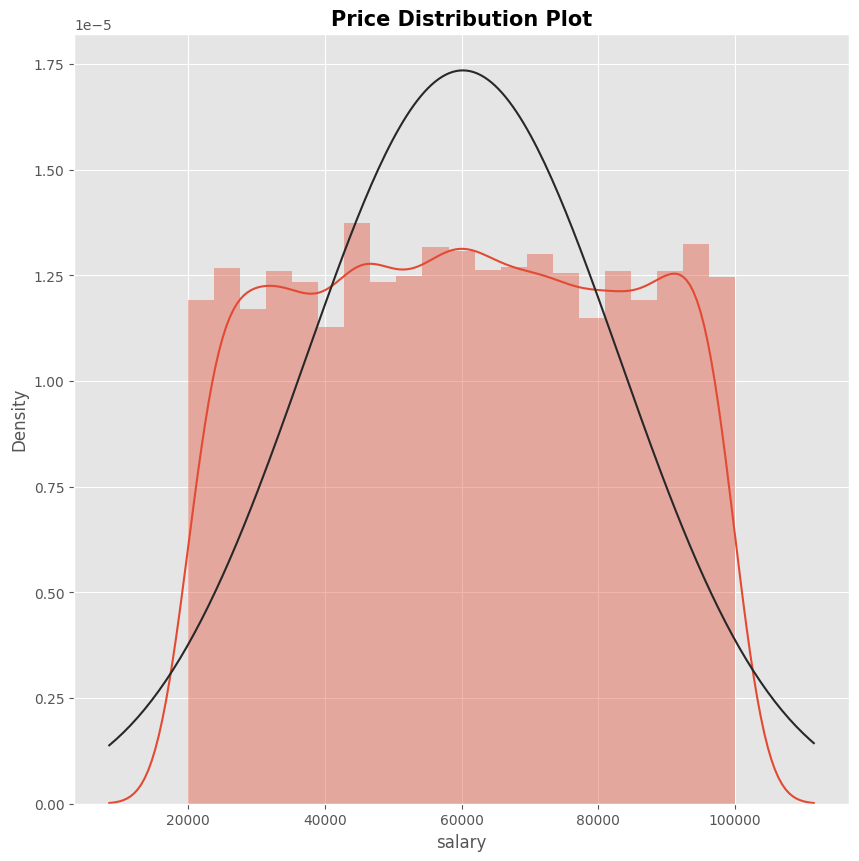

In [227]:
plt.figure(figsize=(10,10))
sns.distplot(df['salary'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

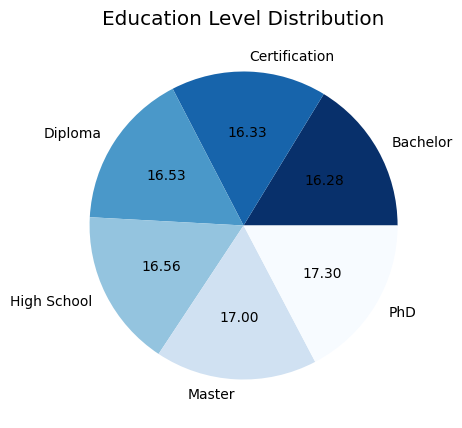

In [228]:
education_counts = Counter(df['education_level'])

# Create a DataFrame from the Counter dictionary
education_input = pd.DataFrame.from_dict(education_counts, orient='index').sort_values(by=0)
education_input.columns = ['education_level']

# Plotting the pie chart
education_input.plot.pie(y='education_level',
                          colormap='Blues_r',
                          figsize=(5, 5),
                          fontsize=10,
                          autopct='%.2f',
                          legend=False,
                          title='Education Level Distribution')

plt.ylabel('')  # Remove y-axis label
plt.show()

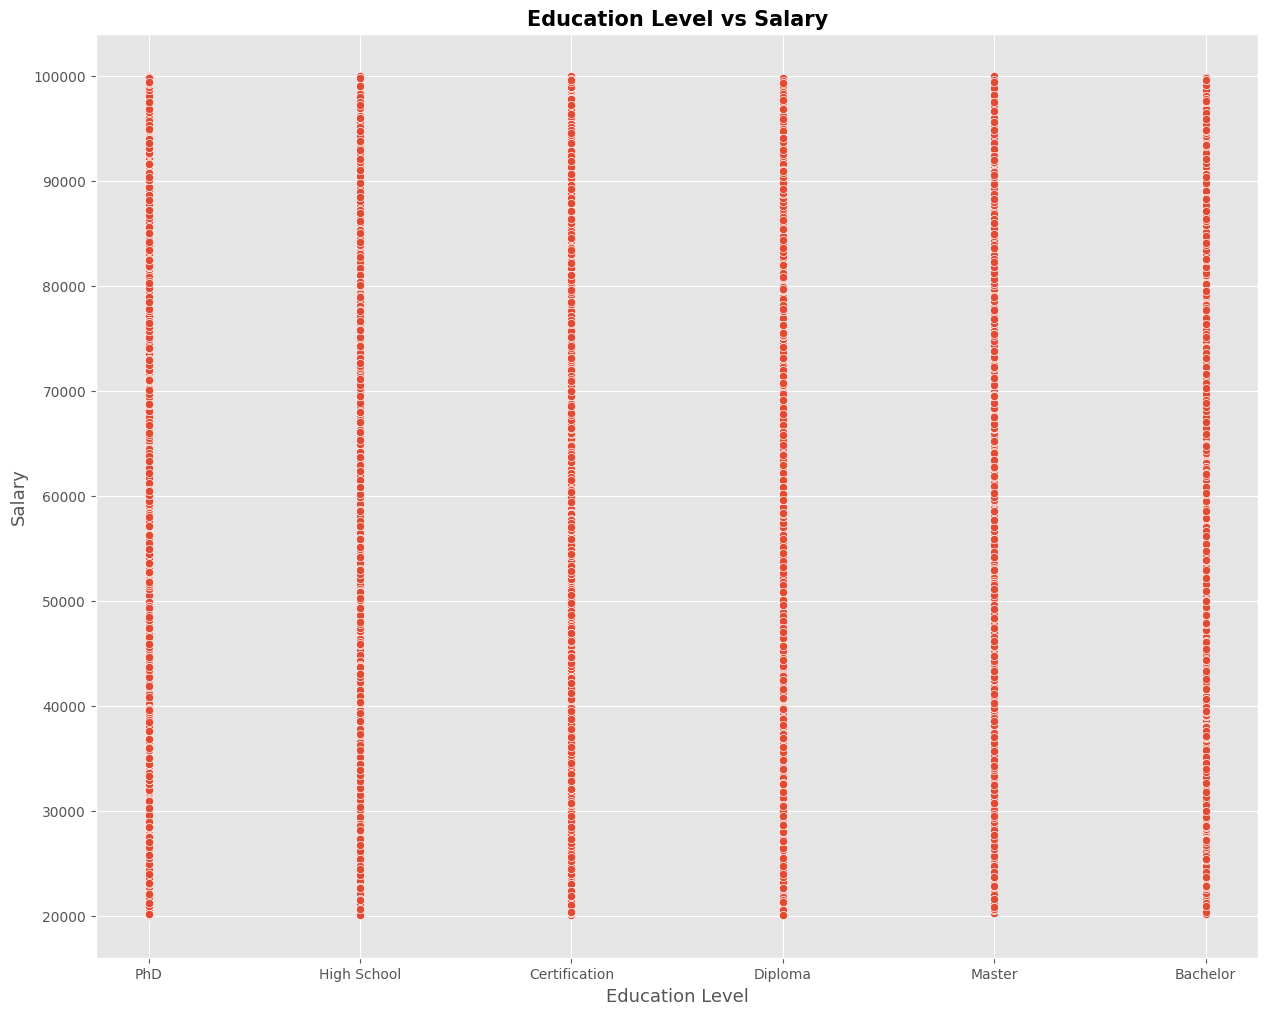

In [229]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x='education_level', y='salary', data=df)

# Adding labels and title
plt.xlabel("Education Level", size=13)
plt.ylabel("Salary", size=13)
plt.title("Education Level vs Salary", size=15, weight='bold')

plt.show()

In [235]:
df1 = df.head(100)
# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get latitude and longitude for a given city
def get_lat_long(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Apply the function to get latitude and longitude for each city
df1['latitude'], df1['longitude'] = zip(*df1['city'].apply(get_lat_long))

# Display the DataFrame
print(df1)


df1 = df1.dropna(subset=['latitude', 'longitude'])

# Create a map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each city
for index, row in df1.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['city']).add_to(india_map)

# Display the map
india_map.save('india_cities_map.html')

   birth_date  gender   salary education_level  years_of_experience  \
0  1974-09-09    Male  80297.0             PhD                   10   
1  1989-04-30  Female  48387.0     High School                   12   
2  1964-04-08  Female  26388.0   Certification                   17   
3  1995-06-21    Male  22692.0     High School                   13   
4  1982-02-01    Male  30024.0         Diploma                    8   
..        ...     ...      ...             ...                  ...   
95 1986-11-12  Female  87992.0         Diploma                   12   
96 1994-06-27  Female  63427.0          Master                    2   
97 1966-03-01    Male  28861.0   Certification                   16   
98 1973-12-09  Female  47315.0             PhD                    3   
99 1988-05-31  Female  43200.0     High School                    4   

               city  Selected  age   latitude  longitude  
0            Haldia      True   50  22.028124  88.063265  
1   Tiruchirappalli      True

<ipython-input-235-16897c47f599>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-235-16897c47f599>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [236]:
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each city
for index, row in df1.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['city']).add_to(india_map)

# Display the map
india_map